## Customer Segmentation using RFM values

#### a) Calculate the RFM value for each customer(by cutomer id)

In [1]:
import pandas as pd
import numpy as np
import time
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

#### Read Data Set

In [2]:
retail_df = pd.read_csv('Online Retail.csv' , delimiter =',')

In [3]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
retail_df.head( 5 )

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [5]:
# To check missing records find the total number of records
retail_df.count()

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

#### Few Descriptions and CutomerIDs are missing.

In [6]:
# Drop missing value records
retail_df = retail_df.dropna(how='any')

In [7]:
retail_df.count()

InvoiceNo      406829
StockCode      406829
Description    406829
Quantity       406829
InvoiceDate    406829
UnitPrice      406829
CustomerID     406829
Country        406829
dtype: int64

##### The data set contains quantity and Unit Price. Total Price is not there, hence add a new column to the dataset
#####  where TotalPrice = Quantity * Unit Price

In [8]:
retail_df['TotalPrice'] =  round((retail_df.Quantity * retail_df.UnitPrice) ,2)

In [9]:

retail_df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [10]:
# Convert the the Invoicedate to only Dtae format and add it to a new column 'NewInvoiceDate'

retail_df['NewInvoiceDate'] = pd.DatetimeIndex(retail_df['InvoiceDate']).date


In [11]:
retail_df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,NewInvoiceDate
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30,2010-01-12
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34,2010-01-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00,2010-01-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34,2010-01-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34,2010-01-12


In [12]:
retail_df.shape

(406829, 10)

#### For Recency calculation, use 12/2011 as current month. If made purchase in December , then the value should be 0 and so on and  so forth.

#### Recency = How many months before current month has customer made last purchase

In [12]:
#Set current Month
current_month = dt.date(2011,12,31)
print(current_month)


2011-12-31


In [13]:
#group by customers and check last date of purshace
recency_df = retail_df.groupby(by='CustomerID', as_index=False)['NewInvoiceDate'].max()
recency_df.columns = ['CustomerID','LastPurchaceDate']
recency_df.head()

,CustomerID,LastPurchaceDate
0,12346.0,2011-01-18
1,12347.0,2011-10-31
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02


In [14]:
recency_df.shape

(4372, 2)

In [15]:
# Define a function to calculate the difference between two months
def diff_month(d1, d2):
    return (d1.year - d2.year) * 12 + d1.month - d2.month


In [16]:
# Calculate recency
recency_df['Recency_in_Months'] = recency_df['LastPurchaceDate'].apply(lambda d: diff_month(current_month, d) )


In [17]:
# Drop unwanted columns from recency data frame
recency_df.drop(['LastPurchaceDate'], axis=1, inplace=True)

In [18]:
recency_df.head(10)

,CustomerID,Recency_in_Months
0,12346.0,11
1,12347.0,2
2,12348.0,3
3,12349.0,1
4,12350.0,10
5,12352.0,3
6,12353.0,7
7,12354.0,8
8,12355.0,3
9,12356.0,1


#### Frequency - At an average how often each customer make purchases in a month

In [19]:
#calculate frequency of purchases
frequency_df = retail_df.groupby(['CustomerID', 'InvoiceNo']).size().groupby('CustomerID').count().reset_index(name='Frequency')
frequency_df.head(10)

,CustomerID,Frequency
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
5,12352.0,11
6,12353.0,1
7,12354.0,1
8,12355.0,1
9,12356.0,3


#### Monetary Value- Total spend by the customer in the whole year

In [20]:
monetary_df = retail_df.groupby('CustomerID')['TotalPrice'].sum().reset_index(name='Monetary_Value')


In [21]:
monetary_df.head()

,CustomerID,Monetary_Value
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


#### Create RFM Table

In [22]:
#Merge recency dataframe with frequency dataframe
rfm_df = recency_df.merge(frequency_df,on='CustomerID')
rfm_df.head()

,CustomerID,Recency_in_Months,Frequency
0,12346.0,11,2
1,12347.0,2,7
2,12348.0,3,4
3,12349.0,1,1
4,12350.0,10,1


In [23]:
#Merge with monetary dataframe to get a table with the 3 columns
rfm_df = rfm_df.merge(monetary_df,on='CustomerID')
rfm_df['CustomerID'] = rfm_df['CustomerID'].astype(int)
rfm_df.head()

,CustomerID,Recency_in_Months,Frequency,Monetary_Value
0,12346,11,2,0.00
1,12347,2,7,4310.00
2,12348,3,4,1797.24
3,12349,1,1,1757.55
4,12350,10,1,334.40


In [24]:
#use CustomerID as index
rfm_df.set_index('CustomerID',inplace=True)

In [25]:
retail_df[retail_df['CustomerID']== 12350.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,NewInvoiceDate
80323,543037,21908,CHOCOLATE THIS WAY METAL SIGN,12,02-02-2011 16:01,2.10,12350.0,Norway,25.2,2011-02-02
80324,543037,22412,METAL SIGN NEIGHBOURHOOD WITCH,12,02-02-2011 16:01,2.10,12350.0,Norway,25.2,2011-02-02
80325,543037,79066K,RETRO MOD TRAY,10,02-02-2011 16:01,0.85,12350.0,Norway,8.5,2011-02-02
80326,543037,79191C,RETRO PLASTIC ELEPHANT TRAY,12,02-02-2011 16:01,0.85,12350.0,Norway,10.2,2011-02-02
80327,543037,22348,TEA BAG PLATE RED RETROSPOT,24,02-02-2011 16:01,0.85,12350.0,Norway,20.4,2011-02-02
80328,543037,84086C,PINK/PURPLE RETRO RADIO,6,02-02-2011 16:01,2.95,12350.0,Norway,17.7,2011-02-02
80329,543037,22551,PLASTERS IN TIN SPACEBOY,12,02-02-2011 16:01,1.65,12350.0,Norway,19.8,2011-02-02
80330,543037,22557,PLASTERS IN TIN VINTAGE PAISLEY,12,02-02-2011 16:01,1.65,12350.0,Norway,19.8,2011-02-02
80331,543037,21832,CHOCOLATE CALCULATOR,12,02-02-2011 16:01,1.65,12350.0,Norway,19.8,2011-02-02
80332,543037,21915,RED HARMONICA IN BOX,12,02-02-2011 16:01,1.25,12350.0,Norway,15.0,2011-02-02


### b) Find Top 10 customers based on frequency and monetary value. Sort them based on first frequency and then monetary value

### Top 10 customers based on Frequency

In [26]:
top_frequencies = rfm_df.sort_values(['Frequency'], ascending=False)

In [27]:
top_frequencies.head(10)

,Recency_in_Months,Frequency,Monetary_Value
CustomerID,,,
14911,0,248,132572.62
12748,0,224,29072.10
17841,0,169,40340.78
14606,0,128,11713.85
13089,0,118,57385.88
15311,0,118,59419.34
12971,0,89,10930.26
14527,0,86,7711.38
13408,0,81,27487.41


### Top 10 customers based on Monetary Value

In [28]:
top_frequencies = rfm_df.sort_values(['Monetary_Value'], ascending=False)

In [29]:
top_frequencies.head(10)

,Recency_in_Months,Frequency,Monetary_Value
CustomerID,,,
14646,0,77,279489.02
18102,1,62,256438.49
17450,0,55,187482.17
14911,0,248,132572.62
12415,1,26,123725.45
14156,0,66,113384.14
17511,0,46,88125.38
16684,1,31,65892.08
13694,1,60,62653.10


### c) Find optimal number of Segments using dendrogram and elbow method

In [30]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [31]:
 rfm_df.rename(columns={'Recency_in_Months': 'Recency',
                        'Frequency': 'Frequency',
                        'Monetary_Value': 'Monetary_value'
                       }, inplace=True)


In [32]:
rfm_df.columns

Index(['Recency', 'Frequency', 'Monetary_value'], dtype='object')

In [33]:
X = rfm_df[['Recency', 'Frequency', 'Monetary_value']]

### Dentogram -  it shows the distance between any two observations in a dataset

In [34]:
from sklearn.cluster import KMeans

In [ ]:
X.head()

##### Take a sample of the data set to create dentogram.

In [35]:
X_sample = X.sample(n=100)
X_sample.shape

(100, 3)

In [37]:
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
scaler = StandardScaler()
X_scaled = scaler.fit_transform( X_sample )
X_scaled[5:5]

array([], shape=(0, 3), dtype=float64)

In [38]:
cmap = sn.cubehelix_palette(as_cmap=True, rot=-0.3, light=1)

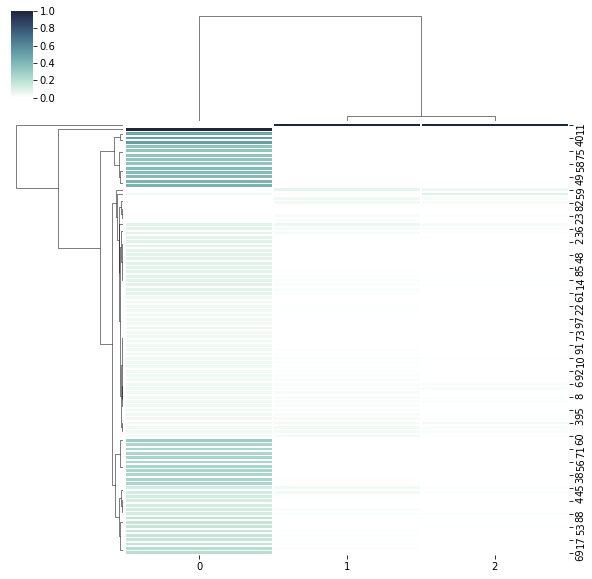

In [39]:
sn.clustermap(X_scaled, cmap=cmap, linewidths=.5, standard_scale=1)

#### Note: From the diagram it can be observed that the number of clusters present are  4 and 6. 

## Elbow Method 

#### It looks at the percentage of variance explained as a function of the number of clusters.
#### The number of clusters are chosen in such a way that adding another cluster doesn't add much value to the 
#### model.

In [40]:
cluster_range = range( 1, 15 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( X_scaled )
  cluster_errors.append( clusters.inertia_ )

In [41]:
clusters_df = pd.DataFrame( { "Num_clusters":cluster_range, "Cluster_errors": cluster_errors } )

In [43]:
clusters_df[0:5]

,Num_clusters,Cluster_errors
0,1,300.000000
1,2,102.785081
2,3,35.880201
3,4,18.282690
4,5,10.106550


#### As k increases, the sum of squared distance tends to zero. Imagine we set k to its maximum value n (where n is number of samples) each sample will form its own cluster meaning sum of squared distances equals zero.

#### Below is a plot of sum of squared distances for k in the range specified above. If the plot looks like an arm, then the elbow on the arm is optimal k.

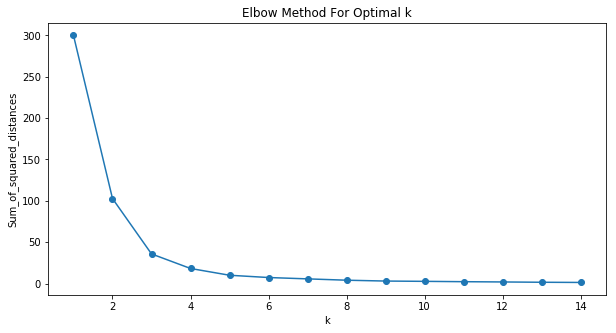

In [44]:
plt.figure(figsize=(10,5))
plt.plot( clusters_df.Num_clusters, clusters_df.Cluster_errors, marker = "o" )
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### Note:
#### From the above diagram it can be observed that variance reduces significantly from 3 to 4 and  4 to 5. 
#### So, optimal number of clusters could be  4

### d) Create Final Segment of cutomers and label the customers based on which segment they belong to

#### From the above clusting methods we got optimum segments as 4. 


In [45]:
Customer_Seg = rfm_df.copy()
Customer_Seg.head()

,Recency,Frequency,Monetary_value
CustomerID,,,
12346,11,2,0.00
12347,2,7,4310.00
12348,3,4,1797.24
12349,1,1,1757.55
12350,10,1,334.40


In [48]:
# Transform the values to standardize it
Customer_Seg_scaled = scaler.fit_transform( Customer_Seg )

### Using K-means algorithm do the segmentation of cutomers to the clusters.

In [49]:
from sklearn.cluster import KMeans

In [50]:
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit(Customer_Seg_scaled)

In [51]:
clusters.cluster_centers_

array([[ 1.50700201, -0.37105075, -0.17942504],
       [-0.43833102, -0.03066225, -0.05305213],
       [-0.8570172 ,  8.98772125, 21.93655825],
       [-0.80246764,  3.81221286,  2.01298203]])

In [52]:
clusters.labels_

array([0, 1, 1, ..., 1, 1, 1])

In [53]:
Customer_Seg['Clusters'] = clusters.labels_

In [54]:
Customer_Seg.head()

,Recency,Frequency,Monetary_value,Clusters
CustomerID,,,,
12346,11,2,0.00,0
12347,2,7,4310.00,1
12348,3,4,1797.24,1
12349,1,1,1757.55,1
12350,10,1,334.40,0


### e) Explain Each Segment intuitively

### A smaller Recency value is better whereas higher Frequency and Monetary values are better. 


In [55]:
customer_ml_cluster_centers = Customer_Seg.groupby(['Clusters']).mean()

In [56]:
customer_ml_cluster_centers

,Recency,Frequency,Monetary_value
Clusters,,,
0,9.132075,1.610725,423.872046
1,1.891659,4.789166,1462.455836
2,0.333333,89.000000,182181.981667
3,0.536364,40.672727,18441.961455


### From the above result we can observe that the cluster 2 has the high valued customers as it has the customers buys very frequently and bought recently. It has high monetary value too. Cluster 3 also contains recently purchased customers who buy moderately frequent. However, the monetary value of cluster 3 is less compared to cluster 2. Cluster 0 and cluster 1 have almost similar features and has less potential customers. It has customers who purchase less frequently and haven’t done any recent purchase. Their monetary value is also less. 